# Getting Started with Hyperkite

This short introduction uses Hyperkite to:

1. Build a neural network that classifies images.

2. Train the model and optimize hyperparameters.

3. And finally evaluate the accuracy of the model.

This tutorial is part of the original [Hyperkite Documentation](https://hyperkite.ai/docs/getting-started/).

### Installation

Install the Hyperkite package by running the following command in your terminal:

In [2]:
pip install git+https://github.com/hyperkite/hyperkite.git

  Cloning https://github.com/hyperkite/hyperkite.git to c:\users\tycho\appdata\local\temp\pip-req-build-muroroht
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/hyperkite/hyperkite.git 'C:\Users\Tycho\AppData\Local\Temp\pip-req-build-muroroht'
    ERROR: Complete output from command python setup.py egg_info:
    ERROR: Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\Tycho\AppData\Local\Temp\pip-req-build-muroroht\setup.py", line 3, in <module>
        with open("README.md", "r") as fh:
    FileNotFoundError: [Errno 2] No such file or directory: 'README.md'
    ----------------------------------------
ERROR: Command "python setup.py egg_info" failed with error code 1 in C:\Users\Tycho\AppData\Local\Temp\pip-req-build-muroroht\


### Define the hyperparameter space


Sign in to [Hyperkite](https://hyperkite.ai/), and press the 'Create Study' button.

<img src="https://github.com/hyperkite/Hyperbase/raw/master/hyperkite/docs/source/_static/screenshot_a.PNG" width="50%"></img>

A nice looking interface will allow you to define the hyperparameters you wish to optimize. In our case, let's call our study `tutorial_study`, and select a Uniform Range between `10` and `1000` named `n_layers`. We can use the default `Hyperopt` optimizer. Your screen should look like this:

<img src="https://github.com/hyperkite/Hyperbase/raw/master/hyperkite/docs/source/_static/screenshot_b.PNG" width="50%"></img>

After defining the hyperparameters you want to optimize in your Study, you will obtain an unique Study `key`. In the next part of the tutorial, this key will be used to easily link our Python training code with Hyperkite.

<img src="https://github.com/hyperkite/Hyperbase/raw/master/hyperkite/docs/source/_static/screenshot_c.PNG" width="50%"></img>

### Loading a Dataset
We obtain a collection of handwritten digits by loading the [Digit Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html) from sklearn:

In [5]:
from sklearn import datasets

# Load dataset
digits = datasets.load_digits()

Split the dataset into a ```training```, ```validation``` and ```testing``` subsets.

| Split      | # Samples | Description |
|------------|-----------|-------------|
| Training   | 1400      | The largest portion of the data samples are used to directly train the model. |
| Validation | 150       | A small portion the data is withheld to evaluate different hyperparameters.
| Testing    | 247       | Another small portion of the data is witheld to evaluate the final performance. |

In [6]:
# Use the first 1400 digits for training
train_data = digits.data[:1400]
train_labels = digits.target[:1400]

# Use the next 150 digits for validation
val_data = digits.data[1500:1650]
val_labels = digits.target[1500:1650]

# Use the last (247) digits for testing
test_data = digits.data[1650:]
test_labels = digits.target[1650:]

print('Training size:', len(train_data))
print('Validation size:', len(val_data))
print('Testing size:', len(test_data))

Training size: 1400
Validation size: 150
Testing size: 147


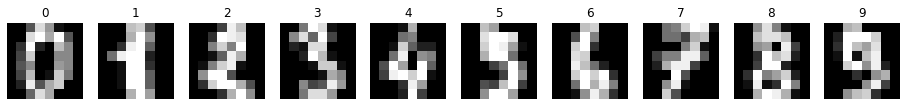

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(16, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    plt.title(i)
    plt.imshow(train_data[np.where(train_labels == i)[0][0]].reshape(8, 8), cmap='gray')
plt.savefig('dataset_example.png')
plt.show()

### Training a Model

In this tutorial we will use the ```MLPClassifier``` neural network classifier from ```sklearn``` to fit our data. If you want, you can replace the model with a more advanced neural network using tools such as Keras, PyTorch or Tensorflow.

In [ ]:
import hyperkite

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss

for _ in range(100):
    # Define model with Hyperkite
    trial = hyperkite.new_trial(key='INSERT_KEY')
    
    model = MLPClassifier(alpha=trial['alpha'],
                          learning_rate_init=trial['learnig_rate'])
    
    # Train model
    model.fit(train_data, train_labels)
    
    # Report back validation loss
    val_loss = log_loss(val_labels, model.predict_proba(val_data))
    hyperkite.report_loss(val_loss)
    
# Calculate accuracy on validation set
val_accuracy = sum(val_predictions == val_labels) / len(val_labels)
print('Validation accuracy:', val_accuracy)

### Final performance with Hyperkite

In [ ]:
hyperkite.get_best_parameters(key='')

# Set-up best found settings
model = MLPClassifier(alpha=trial['alpha'],
                      learning_rate_init=trial['learnig_rate'])

# Train model
model.fit(train_data, train_labels)

# Evaluate final performance on test set
predictions = model.predict(test_data)
accuracy = sum(predictions == test_labels) / len(test_labels)
print('Final accuracy with Hyperkite:', accuracy)

Sweet! The model performs a lot better than without hyperparameter tuning. Also note that using our study `key` we can request the best parameter values from hyperkite at any time later.

## What's next?

Well, now that you have learned how to tune hyperparameters with Hyperkite you can start applying this skill on other machine learning models. Try to replace the MultiLayerPerceptron in the tutorial with other models from sklearn, or start training more advanced deep learning models using [TensorFlow](https://www.tensorflow.org/tutorials) and [PyTorch](https://pytorch.org/tutorials/) and try to optimize them with [Hyperkite](https://hyperkite.ai).